# imuptation techniques
## random sample Imputation

In [2]:
# aim :-  random sample imputation consists of taking random observation from the
#         data we use this observation to replace the nan values.
# When it should be used :- when the data are missing completely at random (MCAR)

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
train=pd.read_csv(r"C:\Users\asus\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [6]:
train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
train.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
train.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)

In [12]:
train.Age

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

In [16]:
train['Age'].dropna().sample(train['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
382    32.00
824     2.00
682    20.00
591    52.00
614    35.00
197    42.00
1      38.00
512    36.00
640    20.00
830    15.00
225    22.00
391    21.00
621    42.00
102    21.00
756    28.00
777     5.00
261     3.00
655    24.00
590    35.00
403    28.00
822    38.00
345    24.00
666    25.00
218    32.00
772    57.00
729    25.00
446    13.00
442    25.00
570    62.00
35     42.00
332    38.00
631    51.00
312    26.00
441    20.00
504    16.00
251    29.00
609    40.00
812    35.00
297     2.00
97     23.00
212    22.00
390    36.00
417    18.00
558    39.00
195    58.00
681    27.00
677    18.00

In [44]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have some index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index

In [45]:
median

28.0

In [46]:
median=train.Age.median()

In [47]:
impute_nan(train,"Age",median)

In [48]:
train[train['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_random', ylabel='Density'>

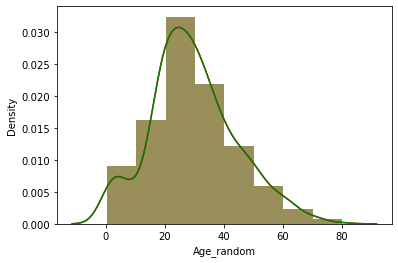

In [54]:
sns.distplot(train['Age'],bins=8,hist=True,label="Age",color="red".)
sns.distplot(train['Age_random'],bins=8,hist=True,label="Age_random",color="green")

#### computing NAN values with a new features

it works well if the data are not missing completely at random

In [55]:
train.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_median', ylabel='Density'>

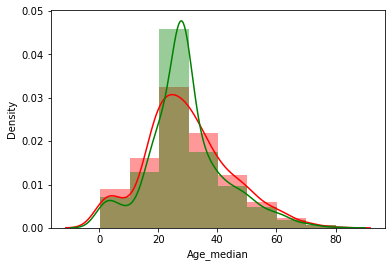

In [58]:
sns.distplot(train['Age'],bins=8,hist=True,label="Age",color="red")
sns.distplot(train['Age_median'],bins=8,hist=True,label="Age_median",color="green")

In [59]:
train=pd.read_csv(r"C:\Users\asus\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [60]:
train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
train.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [62]:
import numpy as np

In [63]:
train['Age_NAN']=np.where(train['Age'].isnull(),1,0)

In [64]:
train.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### advantages
    1.Easy to implement
    2.captures the important of missing values
#### disadvantages
creating additional features(curse of dimensionality)

In [66]:
train['Age'].fillna(train.Age.median(),inplace=True)

In [67]:
train.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [68]:
train.isnull().sum()

Survived    0
Age         0
Fare        0
Age_NAN     0
dtype: int64

#### End of distribution imputation

In [69]:
train=pd.read_csv(r"C:\Users\asus\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [70]:
train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

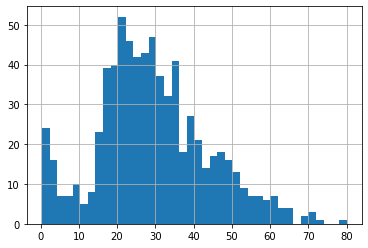

In [74]:
train.Age.hist(bins=40)

In [81]:
extreme_val=train.Age.mean()+3*train.Age.std() # right end of the data we are picking

In [82]:
import seaborn as sns

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

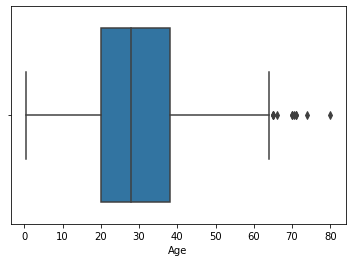

In [83]:
sns.boxplot('Age',data=train)

In [85]:
def impute_nan(df,variable,median,extreme_val):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme_val)
    df[variable].fillna(median,inplace=True)

In [87]:
median=train.Age.median()

In [88]:
impute_nan(train,"Age",median,extreme_val)

In [89]:
train.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [90]:
train.isnull().sum()

Survived                0
Age                     0
Fare                    0
Age_end_distribution    0
dtype: int64

In [3]:
import pandas as pd


In [4]:
train=pd.read_csv(r"C:\Users\asus\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [5]:
train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
train.groupby("Survived").get_group(0)

,Survived,Age,Fare
0,0,22.0,7.2500
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
...,...,...,...
884,0,25.0,7.0500
885,0,39.0,29.1250
886,0,27.0,13.0000
888,0,NaN,23.4500


In [11]:
train.groupby("Fare").get_group(7.2500).mean() # to find the mean of all feature 

Survived     0.076923
Age         29.050000
Fare         7.250000
dtype: float64

In [12]:
train.groupby("Fare").get_group(7.2500).sum() # to find the sum of all feature 

Survived      1.00
Age         290.50
Fare         94.25
dtype: float64

In [13]:
train.groupby("Fare").get_group(7.2500).median() # to find the median of all feature 

Survived     0.00
Age         22.00
Fare         7.25
dtype: float64

In [14]:
train.groupby("Fare").get_group(7.2500).describe()

,Survived,Age,Fare
count,13.000000,10.0000,13.00
mean,0.076923,29.0500,7.25
std,0.277350,13.2213,0.00
min,0.000000,20.5000,7.25
25%,0.000000,22.0000,7.25
50%,0.000000,22.0000,7.25
75%,0.000000,28.7500,7.25
max,1.000000,59.0000,7.25


In [16]:
train.groupby("Fare").get_group(7.2500).agg(['sum','min','max'])

,Survived,Age,Fare
sum,1,290.5,94.25
min,0,20.5,7.25
max,1,59.0,7.25


In [17]:
gr=train.groupby("Survived")

In [18]:
for i , j_df in gr:
    print(i)
    print(j_df)

0
     Survived   Age     Fare
0           0  22.0   7.2500
4           0  35.0   8.0500
5           0   NaN   8.4583
6           0  54.0  51.8625
7           0   2.0  21.0750
..        ...   ...      ...
884         0  25.0   7.0500
885         0  39.0  29.1250
886         0  27.0  13.0000
888         0   NaN  23.4500
890         0  32.0   7.7500

[549 rows x 3 columns]
1
     Survived   Age     Fare
1           1  38.0  71.2833
2           1  26.0   7.9250
3           1  35.0  53.1000
8           1  27.0  11.1333
9           1  14.0  30.0708
..        ...   ...      ...
875         1  15.0   7.2250
879         1  56.0  83.1583
880         1  25.0  26.0000
887         1  19.0  30.0000
889         1  26.0  30.0000

[342 rows x 3 columns]


In [19]:
gr.get_group(0)

,Survived,Age,Fare
0,0,22.0,7.2500
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
...,...,...,...
884,0,25.0,7.0500
885,0,39.0,29.1250
886,0,27.0,13.0000
888,0,NaN,23.4500


In [20]:
gr.max()

,Age,Fare
Survived,,
0,74.0,263.0000
1,80.0,512.3292


In [21]:
gr.describe()

Age                                                       Fare  \
          count       mean        std   min   25%   50%   75%   max  count   
Survived                                                                     
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  549.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  342.0   

                                                                    
               mean        std  min      25%   50%   75%       max  
Survived                                                            
0         22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000  
1         48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

In [22]:
import matplotlib.pyplot as plt

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

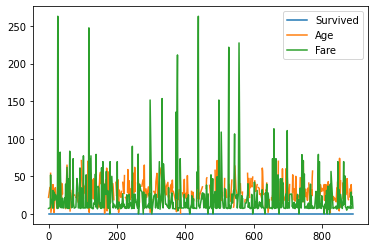

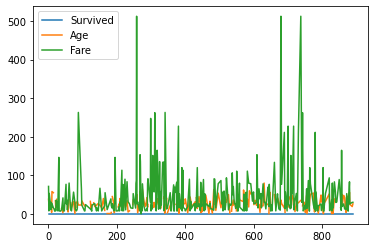

In [23]:
gr.plot()